# This chart uses the match logs from the match log download
### Make sure you've run that for the league(s) you want to plot teams here with.
### Also, if you want to add images, make sure to make a folder with club images wherever the Root file path is
#### Example path:  /Root Path/Images/League/TeamImage.png

C:\Users\Ben\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


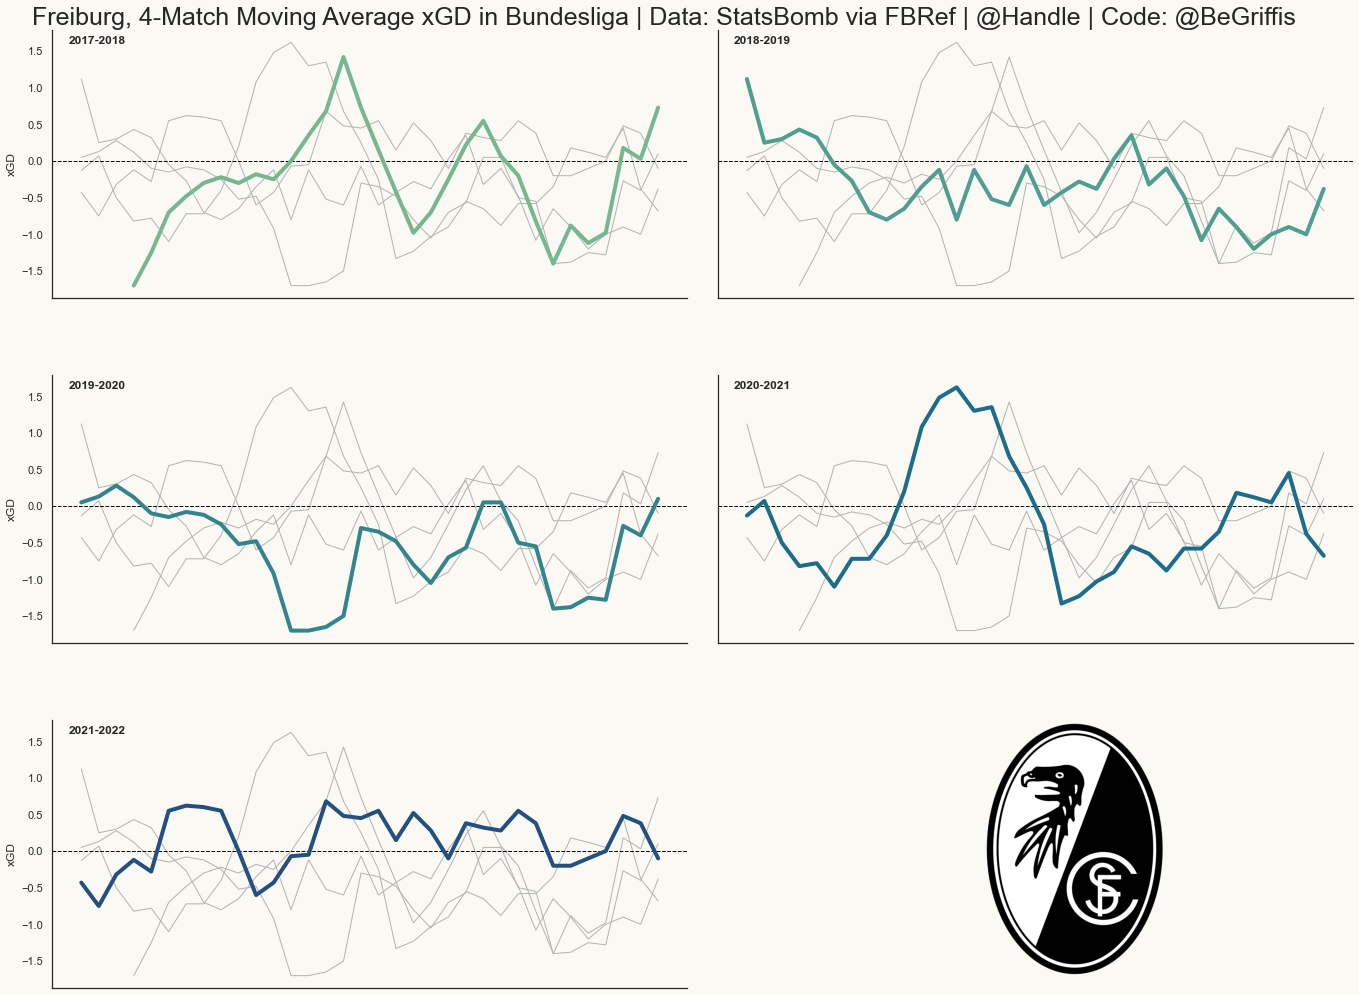

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from pathlib import Path
sns.set_theme(style="white")

# this is the file path root, i.e. where this file is located
root = str(Path(os.getcwd()).parents[0]).replace('\\','/')+'/'

############# Change these variables #############

league = 'Bundesliga'      # The league the club is in
team = "Freiburg"          # The club you want to visualize (if they have not been in the league for all 5 seasons, it'll just show the ones they participated in)
var = 'xGD'                # the variable you want to plot MA for (xGD, xG, GD-xGD, etc)
signature = '@Handle'      # Your @handle
period = 4                 # The period to be used for the moving average (I prefer an even number, since an odd number will normally include more home or away matches)
image_ = 'y'               # 'y' for including the team's logo. 'n' (or just not 'y') for not including image
save_chart = 'n'           # 'y' for saving it locally, 'n' for just viewing it here'

#### IMPORTANT TO EDIT THIS IF YOU WANT TO USE AN IMAGE
#### COMMENT THIS OUT IF YOU DON'T WANT AN IMAGE
image_folder_path = '%sImages/' %(root,)
image = Image.open('%s%s/%s.png' %(image_folder_path,league,team))

###################################################

df = pd.read_csv("%s%s Match Log.csv" %(root, league))
df = df[df['Team']==team]
df['%i Match MA %s' %(period,var)] = float(0.0)
arr = df[var].values

i = 0
# Initialize an empty list to store moving averages
moving_averages = []
  
# Loop through the array t o
#consider every window of size 3
while i < len(arr) - period + 1:
  
    # Calculate the average of current window
    period_average = round(np.sum(arr[i:i+period]) / period, 2)
      
    # Store the average of current
    # window in moving average list
    moving_averages.append(period_average)
      
    # Shift window to right by one position
    i += 1
    
for i in range(len(moving_averages)):
    j = i+(period-1)
    df['%i Match MA %s' %(period,var)].iloc[j] = moving_averages[i]
for i in range(0,(period-1)):
    df['%i Match MA %s' %(period,var)].iloc[i] = np.nan

######################################################################################################################

# Plot each year's time series in its own facet
g = sns.relplot(
    data=df,
    x="Match Number", y=('%i Match MA %s' %(period,var)), col="Season", hue="Season",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=2, height=3, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for season, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.025, .95, season, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=df, x="Match Number", y=('%i Match MA %s' %(period,var)), units="Season",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )
    ax.set_facecolor('#fbf9f4')


g.refline(y=0, color='black', lw=1)

# Don't show the X axis
ax.set(xticks=[])

# Set various labels/titles
g.set_titles("")
g.set_axis_labels("", "%s" %var)

fig = plt.gcf()
fig.set_size_inches(20, 15)

fig.patch.set_facecolor('#fbf9f4') # This has basically become my signature color. feel free to change it obviously

fig.suptitle('%s, %i-Match Moving Average %s in %s | Data: StatsBomb via FBRef | %s | Code: @BeGriffis' %(team,period,var,league,signature),
             fontsize=25)

if image_ == 'y':
    newax = fig.add_axes([0.6,0.075,0.25,0.25], anchor='SE', zorder=1) # the numbers in [] place and size the image
    # [0.6,0.075,0.25,0.25] is best placement for a team having all 5 seasons
    # [0.94,0.9,0.1,0.1] is a good otpion for teams with fewer than 5 seasons... sticks the image in the top right corner
    newax.imshow(image)
    newax.axis('off')

if save_chart == 'y':
    fig.savefig("%s%s %i Match MA %s.png" %(root, team, period, var), dpi=220)